In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/107.7 GB disk)


In [3]:
from ultralytics import YOLO
import requests

# n is for nano , s for small and so on
model=YOLO('yolo11n.pt')


0: 384x640 2 cars, 118.9ms
Speed: 2.1ms preprocess, 118.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[[     227.65      100.45      308.22      173.84]
 [   0.093898      115.64      40.368      141.45]]


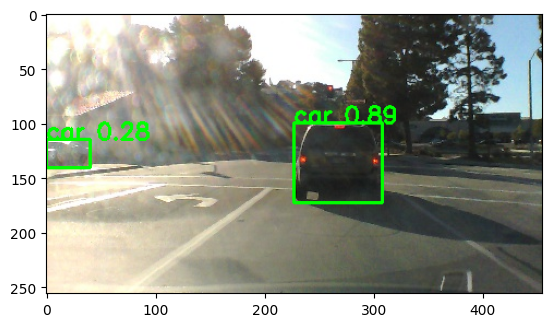

In [96]:
import random
import supervision as sv
from PIL import Image
import time

random_images=random.sample(os.listdir("/content/drive/MyDrive/Datasets/steering_angle/data"),1)
for img in random_images:
  start_time=time.time()
  img=Image.open(f"/content/drive/MyDrive/Datasets/steering_angle/data/{img}")
  result=model.predict(img,conf=0.25,show=False)[0]
  # print(sv.Detections.from_ultralytics(result))
  result=sv.Detections.from_ultralytics(result)
  print(result.xyxy)
  img=np.array(img)
  for i,lab,conf in zip(result.xyxy,result.class_id,result.confidence):
    cv2.rectangle(img,(int(i[0]),int(i[1])),(int(i[2]),int(i[3])),color=(0,255,0),thickness=2)
    cv2.putText(img,f"{model.names[lab]} {conf:.2f}",(int(i[0]),int(i[1])),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
  plt.imshow(img)
  plt.show()